# K-Mean Clustering

you can read artical on unsupervised 
https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a#:~:text=K-Means%20Clustering%20K-means%20is%20one%20of%20the%20simplest,to%20define%20k%20centres%2C%20one%20for%20each%20cluster.

**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and recomedation

In [43]:
# import require libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the data
retail_df=pd.read_csv(r'D:\har\mldl\upgrad\Unsupervised learning\Online+Retail.csv', sep=",", encoding="ISO-8859-1", header=0)
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [3]:
# basics of datatframe
retail_df.shape

(541909, 8)

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 2.Clean the Data

In [6]:
# idetify missing value in dataframe
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# missing value in percentage%

round(100*(retail_df.isnull().sum())/len(retail_df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
# drop all rows having missing values
retail_df=retail_df.dropna()
retail_df.shape

(406829, 8)

In [9]:
# new column amount
retail_df['amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

# to calculate the monetory value we needed to calculate theeamount

<ipython-input-9-a1ec1a362864>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['amount']=retail_df['Quantity']*retail_df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


# 3. Prepare the data for modelling

- R (Recency): number of days since last purchase.
- F (Frequency) : number of transantion.
- M (Monetory) : total amount of tansantion(revenue contributed by customer).

create the above 3 columns

In [10]:
# monetory
grouped_df=retail_df.groupby('CustomerID')['amount'].sum()
grouped_df=grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [11]:
# second dervive metric frequency
frequency=retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
# merge the dataframe
grouped_df=pd.merge(grouped_df,frequency, on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [13]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


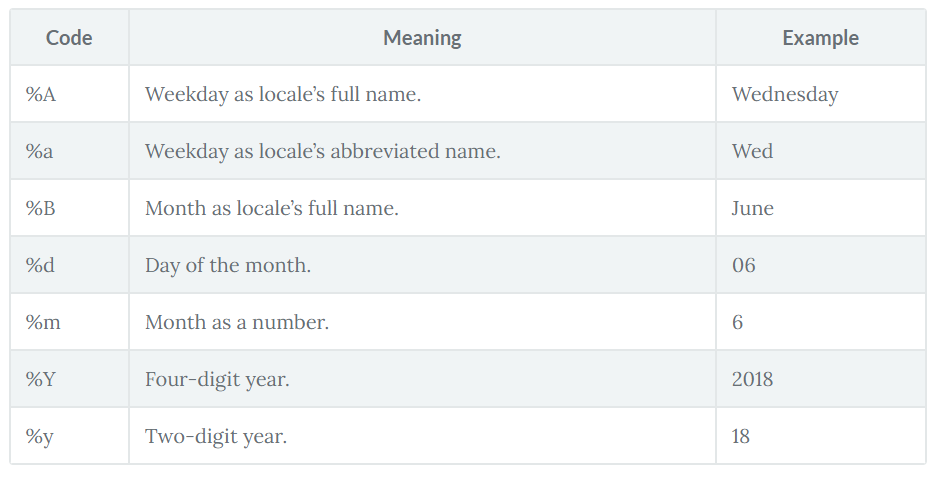

In [14]:
#now  make recenancy
# cut-3 : 300 days ago,200,50,10,4
#recenancy 4


#convert to date time

retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

<ipython-input-14-e752918837f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')


In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [16]:
#compute the max date
max_date=max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
# compute the diff
retail_df['diff']=max_date-retail_df['InvoiceDate']
retail_df.head()

<ipython-input-17-14d52c665d56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['diff']=max_date-retail_df['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [18]:
# recenacy

last_purchase=retail_df.groupby('CustomerID')['diff'].min()
last_purchase=last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [19]:
grouped_df=pd.merge(grouped_df,last_purchase,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [20]:
# cahnge the column name
grouped_df.columns=['CustomerID','amount','frequency','recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


extracting number of days from recenacy
from datetime as dt

In [21]:
# number of days
grouped_df['recency']=grouped_df['recency'].dt.days
grouped_df

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


{'whiskers': [<matplotlib.lines.Line2D at 0x1de39334be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de3934f280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de393348b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de3934f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de3934fd60>],
 'means': []}

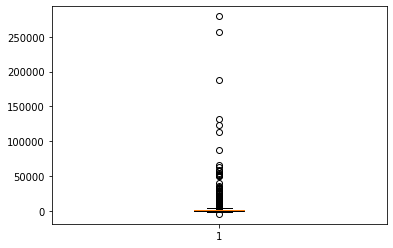

In [22]:
#1 outlier treatment
plt.boxplot(grouped_df['amount'])

2 types of outliers 
- statastical outlier
- domain oulier

{'whiskers': [<matplotlib.lines.Line2D at 0x1de39ae0790>,
 'caps': [<matplotlib.lines.Line2D at 0x1de39ae0eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de39ae0400>],
 'medians': [<matplotlib.lines.Line2D at 0x1de39aec610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de39aec9a0>],
 'means': []}

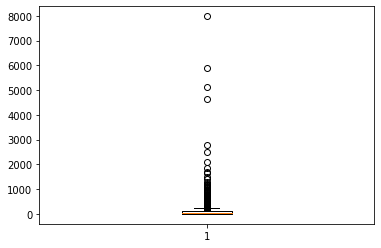

In [23]:
plt.boxplot(grouped_df['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de39b5c1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de39b5c8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de39b4cdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de39b68040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de39b683d0>],
 'means': []}

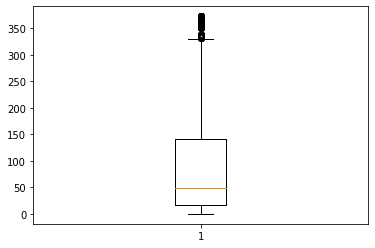

In [24]:
plt.boxplot(grouped_df['recency'])

In [25]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]



In [26]:
#rescaling
rfm_df=grouped_df[['amount','frequency','recency']]
rfm_df.head()


,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [27]:
# instantiate
scaler=StandardScaler()

#fit_transform
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape
# converted to bumpy array


(4293, 3)

# 4. Modelling

In [28]:
# while fit has given us numpy array now we have to convert to dataframe
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['amount','frequency','recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [29]:
#k-means with some arbitatry k
k_means=KMeans(n_clusters=4,max_iter=50)
k_means.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [30]:
k_means.labels_

array([1, 0, 2, ..., 1, 2, 2])

# Finding the Optimal number of Cluster

Now you might be thinking why the number of clusters is taken as 4 and not any other number. To find the optimum number of clusters, we use two techniques - the elbow curve method and the silhouette score method. 

[7661.683092517178, 4433.580619302109, 3360.3745977359013, 2802.969079137902, 2392.237169966557, 2038.532425943883, 1826.2250071825943]


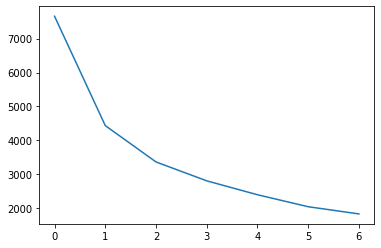

In [31]:
#elbow-curve/SSD
ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
    kmeans=KMeans(n_clusters=num_cluster,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
#plot SSD for each n_clusters
print(ssd)
plt.plot(ssd)


The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10).

Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

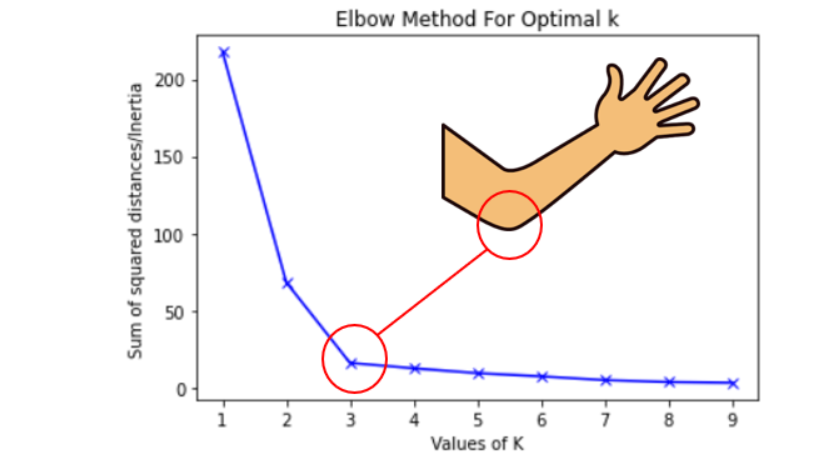

one of the method for cluster idetification

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [32]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.48148099614734263
For n_clusters=5, the silhouette score is 0.4662700564189704
For n_clusters=6, the silhouette score is 0.4170584389874765
For n_clusters=7, the silhouette score is 0.41763065866927357
For n_clusters=8, the silhouette score is 0.4123480368262971


2. Silhouette analysis
The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

- Select a range of values of k (say 1 to 10).
- Plot Silhouette coefﬁcient for each value of K.
The equation for calculating the silhouette coefﬁcient for a particular data point:
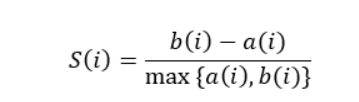


silhouette score
- S(i) is the silhouette coefficient of the data point i.
- a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
- b(i) is the average distance from i to all clusters to which i does not belong.
K-Mean intra-cluster distance
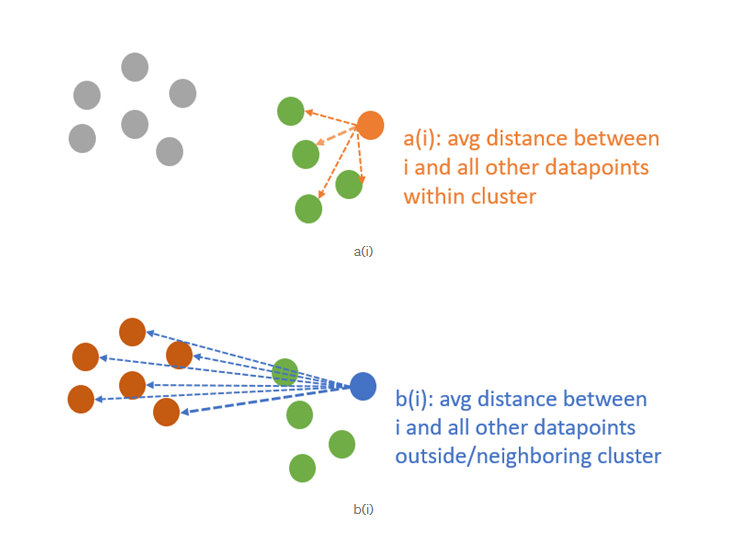
Image Source:https://ankitajhumu.medium.com/selecting-number-of-clusters-in-k-mean-clustering-d60a1f85d65b

K-Mean intercluster distance
Image Source: https://ankitajhumu.medium.com/selecting-number-of-clusters-in-k-mean-clustering-d60a1f85d65b
 



We will then calculate the average_silhouette for every k.
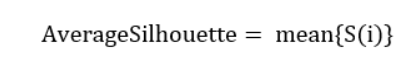
Avg silhouette
Then plot the graph between average_silhouette and K.

Points to remember while calculating silhouette coefficient:
The value of the silhouette coefﬁcient is between [-1, 1].
A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
The worst value is -1. Values near 0 denote overlapping clusters.

Now that you've understood the concept of finding the optimal number of clusters, the next segment would deal with analysing these clusters for further understanding our segmentation process.

In [33]:
#final model with k=3
#k-means with some arbitatry k
k_means=KMeans(n_clusters=3,max_iter=50)
k_means.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [34]:
k_means.labels_

array([2, 0, 1, ..., 2, 1, 1])

First , we need to assign the Cluster IDs that we generated to each of the datapoints that we have with us.

In [35]:
#assign the labels
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [36]:
grouped_df['cluster_id']=k_means.labels_

In [37]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='cluster_id', ylabel='amount'>

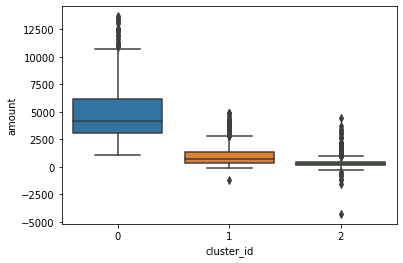

In [38]:
#plot
sns.boxplot(x='cluster_id',y='amount',data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='recency'>

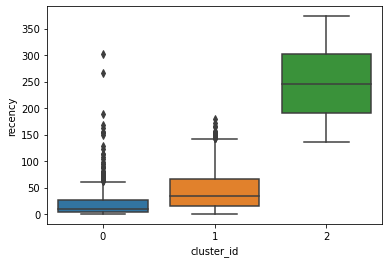

In [39]:

sns.boxplot(x='cluster_id',y='recency',data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='frequency'>

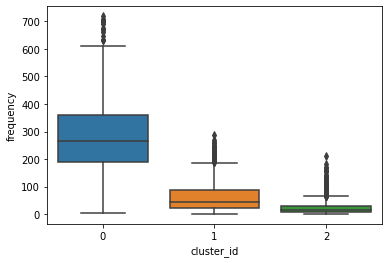

In [40]:

sns.boxplot(x='cluster_id',y='frequency',data=grouped_df)

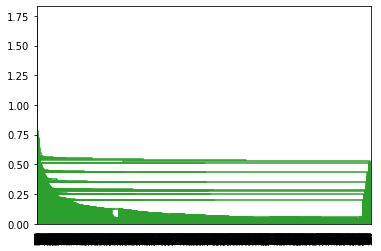

In [48]:
# single linkage
merging=linkage(rfm_df_scaled, method='single', metric='euclidean')
dendrogram(merging)
plt.show()

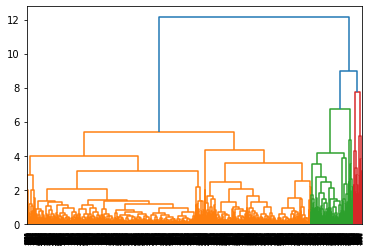

In [50]:
# single linkage
merging=linkage(rfm_df_scaled, method='complete', metric='euclidean')
dendrogram(merging)
plt.show()

In [52]:
#3 cluster
cut_tree(merging,n_clusters=3).shape

(4293, 1)

In [53]:
cut_tree(merging,n_clusters=3)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

it is 1d numpy array

In [54]:
cluster_labels=cut_tree(merging,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [55]:
# assigning cluster labels
grouped_df['cluster_labels']=cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='cluster_labels', ylabel='amount'>

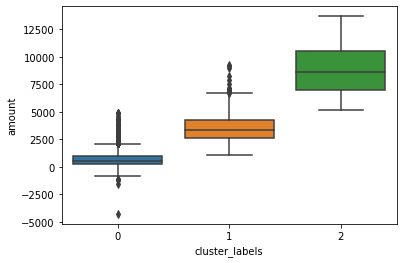

In [57]:
# plots
sns.boxplot(x='cluster_labels',y='amount',data=grouped_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='frequency'>

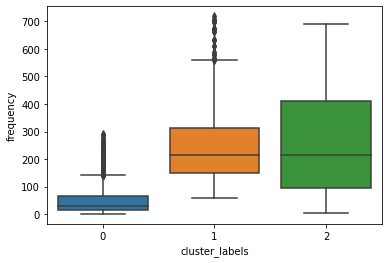

In [58]:
sns.boxplot(x='cluster_labels',y='frequency',data=grouped_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

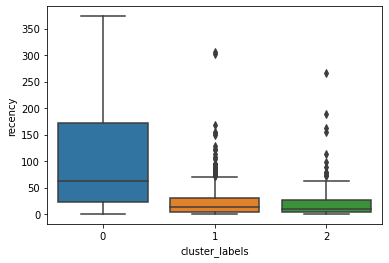

In [59]:
sns.boxplot(x='cluster_labels',y='recency',data=grouped_df)